In [43]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, Image, display, HTML
import msgpack as mp
import msgpack_numpy as mpn
import base64
from datetime import datetime
import os
from tqdm import tqdm

In [9]:
base_pth = "C:\mira\splitVideos\SAMXXXXXXXXU010120000000XXXXXXXXX\Session 04-02-22_14-03-00_359"
_prm = os.listdir(r"C:\mira\splitVideos\SAMXXXXXXXXU010120000000XXXXXXXXX\Session 04-02-22_14-03-00_359")

for i in _prm:
    if i.startswith("PARAMS"):
        _p_fname = i
prm_file = base_pth + "\\" + _p_fname
prm_file

p = open(prm_file, "rb")
unpacker = mp.Unpacker(p, object_hook=mpn.decode)
prm = []
for unpacked in unpacker:
    prm.append(unpacked)
prm.pop(0)
prm.pop(0)


video_time = []
for i in prm:
    video_time.append(datetime.strptime(i[0], '%Y-%m-%d %H:%M:%S.%f'))
v_start = video_time[0]
v_start


datetime.datetime(2022, 2, 4, 14, 4, 22, 302062)

In [33]:
imu_1 = pd.read_csv(base_pth+"//1_imu.csv")
imu_2 = pd.read_csv(base_pth+"//2_imu.csv")


In [34]:
def datetime_to_s(df, c_name, sys_t=None, offset=0):
    """this function changes datetime string to seconds"""
    inf = datetime.strptime(df[c_name][0], '%Y-%m-%d %H:%M:%S.%f')
    dif_list = []
    for idx, val in enumerate(df[c_name]):
        _val = datetime.strptime(val, '%Y-%m-%d %H:%M:%S.%f')
        if sys_t:
            # diff = (_val - inf) - sys_t
            diff = _val - sys_t

        else:
            diff = _val - inf
            
        _diff = diff.total_seconds()
        # df["seconds"].loc[idx] = _diff
        dif_list.append(_diff)
    df["sys_sec"] = dif_list
    return df

In [37]:
# plt.plot(imu_1["imu_time"], imu_1["ax"])
imu_1 = datetime_to_s(imu_1, "sys_time", v_start)
imu_2 = datetime_to_s(imu_2, "sys_time", v_start)

imu_2

,sys_time,imu_time,ax,ay,az,gx,gy,gz,sys_sec
0,2022-02-04 14:04:40.154947,45.337955,-0.005615,0.574097,0.819946,5.493164,-3.906250,-2.624512,17.852885
1,2022-02-04 14:04:40.154947,45.347137,-0.005249,0.577637,0.816162,5.187988,-3.845215,-2.685547,17.852885
2,2022-02-04 14:04:40.156950,45.356727,-0.005737,0.579224,0.816040,4.638672,-3.845215,-2.685547,17.854888
3,2022-02-04 14:04:40.157950,45.365910,-0.005127,0.583252,0.813965,3.967285,-3.723145,-2.746582,17.855888
4,2022-02-04 14:04:40.158952,45.375095,-0.003784,0.585327,0.812378,3.173828,-3.540039,-2.624512,17.856890
...,...,...,...,...,...,...,...,...,...
1829,2022-02-04 14:05:16.873951,80.674999,0.017578,0.591064,0.822388,2.929688,-2.807617,-2.929688,54.571889
1830,2022-02-04 14:05:16.877948,80.683509,0.020874,0.593384,0.810791,2.441406,-2.807617,-2.685547,54.575886
1831,2022-02-04 14:05:16.935949,80.692694,0.021362,0.602783,0.792114,1.831055,-3.173828,-2.624512,54.633887
1832,2022-02-04 14:05:16.937950,80.733108,0.026489,0.591431,0.808105,-4.882812,-2.746582,-2.441406,54.635888


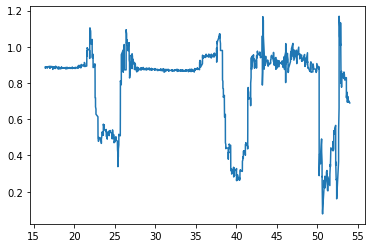

In [40]:
plt.plot(imu_1["sys_sec"], imu_1["az"])

In [41]:
video_data = cv2.VideoCapture(base_pth+"//video.avi")

_i = 0

while video_data.isOpened:
    ret, frame = video_data.read()
    frame = cv2.flip(frame, 1)
    vid_diff = video_time[_i] - video_time[0] 
    _vid_diff = vid_diff.total_seconds()
    _i += 1
    # font
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    # org
    org = (50, 50)
    
    # fontScale
    fontScale = 1
    
    # Blue color in BGR
    color = (255, 0, 0)
    
    # Line thickness of 2 px
    thickness = 2
    
    # Using cv2.putText() method
    image = cv2.putText(frame, str(_vid_diff), org, font, 
                    fontScale, color, thickness, cv2.LINE_AA)
    if ret:
        cv2.imshow("",frame)
        # plt.show()
        
    if cv2.waitKey(25) & 0xFF == ord('q'):
          break
    if not ret:
        break
    
    
    
cv2.destroyAllWindows()
        

IndexError: list index out of range